# Gender Classifier

This note we'll build a CNN to classify the gender problem. To build our CNN we'll use [tensorflow](https://www.tensorflow.org/).

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pkl
from sklearn.model_selection import train_test_split
from glob import glob
%matplotlib inline

## Helpers

In [2]:
def load(name):
    with open(name, 'rb') as f:
        return pkl.load(f)

def unwrapper_data(data):
    images = []
    labels = []
    for f in data:
        data = load(f)
        for X, y in zip(data['X'], data['y']):
            images.append(X)
            labels.append(y)
    return np.array(images, dtype=np.uint8),  np.array(labels, dtype=np.uint8)

In [3]:
DATA_PATH = 'data/gender/'
data = glob(DATA_PATH+'*.pkl')
print(data)

['data/gender/02.pkl', 'data/gender/03.pkl', 'data/gender/01.pkl', 'data/gender/04.pkl', 'data/gender/05.pkl']


## Model

In [16]:
classifier = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=(200,200,3)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),  
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_36 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
activation_36 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
batch_normalization_37 (Batc (None, 50, 50, 128)       512       
_________________________________________________________________
activation_37 (Activation)   (None, 50, 50, 128)       0         
__________

## Input

In [17]:
X, y = unwrapper_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20151, 200, 200, 3), (3557, 200, 200, 3), (20151,), (3557,))

## Training

In [18]:
BATCH_SIZE = 64
EPOCHS = 100

In [19]:
list_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                  tf.keras.callbacks.ModelCheckpoint('models/best_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)]
classifier.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

hist = classifier.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=list_callbacks, validation_split=0.15)

Train on 17128 samples, validate on 3023 samples
Epoch 1/100
17088/17128 [============================>.] - ETA: 2s - loss: 2.7895 - acc: 0.6311
Epoch 00001: val_loss improved from inf to 0.55644, saving model to models/best_model.hdf5
17128/17128 [==============================] - 1181s 69ms/step - loss: 2.7843 - acc: 0.6312 - val_loss: 0.5564 - val_acc: 0.7271
Epoch 2/100
17088/17128 [============================>.] - ETA: 3s - loss: 0.4799 - acc: 0.7707
Epoch 00002: val_loss improved from 0.55644 to 0.39197, saving model to models/best_model.hdf5
17128/17128 [==============================] - 1364s 80ms/step - loss: 0.4802 - acc: 0.7708 - val_loss: 0.3920 - val_acc: 0.8243
Epoch 3/100
17088/17128 [============================>.] - ETA: 2s - loss: 0.3856 - acc: 0.8243
Epoch 00003: val_loss improved from 0.39197 to 0.33869, saving model to models/best_model.hdf5
17128/17128 [==============================] - 1231s 72ms/step - loss: 0.3859 - acc: 0.8243 - val_loss: 0.3387 - val_acc: 0.

Epoch 29/100
17088/17128 [============================>.] - ETA: 3s - loss: 0.0856 - acc: 0.9613
Epoch 00029: val_loss did not improve from 0.23418
17128/17128 [==============================] - 1416s 83ms/step - loss: 0.0855 - acc: 0.9613 - val_loss: 0.2927 - val_acc: 0.8978
Epoch 30/100
17088/17128 [============================>.] - ETA: 2s - loss: 0.0782 - acc: 0.9656
Epoch 00030: val_loss did not improve from 0.23418
17128/17128 [==============================] - 1320s 77ms/step - loss: 0.0781 - acc: 0.9657 - val_loss: 0.3002 - val_acc: 0.9001
Epoch 00030: early stopping


In [20]:
print('Train =>', classifier.evaluate(X_train, y_train, verbose=0))
print('Test =>', classifier.evaluate(X_test, y_test, verbose=0))

Train => [0.08880134740512807, 0.9703240533761485]
Test => [0.28022551612333113, 0.9072251897666573]


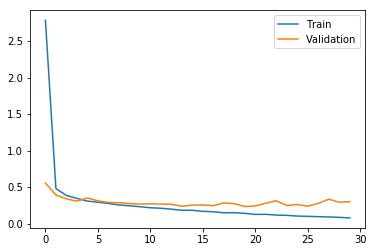

In [21]:
hist_dict = hist.history
loss_val = hist_dict['val_loss']
loss_train = hist_dict['loss']

plt.figure()
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.legend()

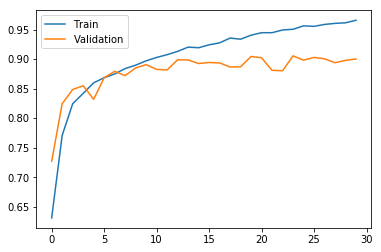

In [22]:
hist_dict = hist.history
acc_val = hist_dict['val_acc']
acc_train = hist_dict['acc']

plt.figure()
plt.plot(acc_train, label='Train')
plt.plot(acc_val, label='Validation')
plt.legend()